In [1]:
!pip install tf-nightly

     |████████████████████████████████| 517.6MB 30kB/s 
     |████████████████████████████████| 3.0MB 33.4MB/s 
     |████████████████████████████████| 460kB 45.2MB/s 


In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [4]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKGWT6A/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKGWT6A/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKGWT6A/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder

In [6]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

Задание 1.
Загрузите данные. Преобразуйте текстовые файлы во внутренние структуры данных, которые используют индексы вместо слов.


In [0]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

In [0]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE))

Задание 2.
Реализуйте и обучите двунаправленную рекуррентную сеть (LSTM или GRU). Какого качества классификации удалось достичь?



In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 54s 138ms/step - loss: 0.6382 - accuracy: 0.5744 - val_loss: 0.4540 - val_accuracy: 0.8010
Epoch 2/10
391/391 [==============================] - 53s 136ms/step - loss: 0.3382 - accuracy: 0.8552 - val_loss: 0.3406 - val_accuracy: 0.8625
Epoch 3/10
391/391 [==============================] - 53s 136ms/step - loss: 0.2411 - accuracy: 0.9055 - val_loss: 0.3319 - val_accuracy: 0.8734
Epoch 4/10
391/391 [==============================] - 53s 136ms/step - loss: 0.2072 - accuracy: 0.9223 - val_loss: 0.3354 - val_accuracy: 0.8755
Epoch 5/10
391/391 [==============================] - 54s 138ms/step - loss: 0.1741 - accuracy: 0.9377 - val_loss: 0.3914 - val_accuracy: 0.8630
Epoch 6/10
391/391 [==============================] - 54s 138ms/step - loss: 0.1577 - accuracy: 0.9438 - val_loss: 0.3809 - val_accuracy: 0.8661
Epoch 7/10
391/391 [==============================] - 54s 137ms/step - loss: 0.1387 - accuracy: 0.9520 - val_loss: 0.4127 - val_ac

In [13]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 20s 50ms/step - loss: 0.4426 - accuracy: 0.8431
Test Loss: 0.44258567690849304
Test Accuracy: 0.8430799841880798


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

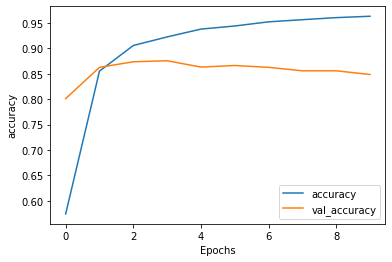

In [16]:
plot_graphs(history, 'accuracy')

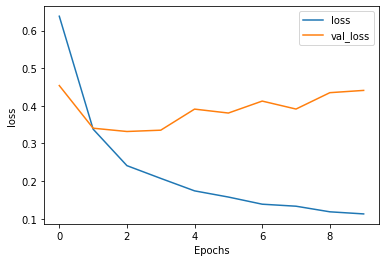

In [17]:
plot_graphs(history, 'loss')

Задание 4.
Поэкспериментируйте со структурой сети (добавьте больше рекуррентных, полносвязных или сверточных слоев). Как это повлияло на качество классификации?


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [0]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 93s 239ms/step - loss: 0.6717 - accuracy: 0.5360 - val_loss: 0.5512 - val_accuracy: 0.7370
Epoch 2/10
391/391 [==============================] - 93s 238ms/step - loss: 0.4295 - accuracy: 0.8154 - val_loss: 0.3640 - val_accuracy: 0.8542
Epoch 3/10
391/391 [==============================] - 94s 240ms/step - loss: 0.2961 - accuracy: 0.8903 - val_loss: 0.3462 - val_accuracy: 0.8583
Epoch 4/10
391/391 [==============================] - 94s 242ms/step - loss: 0.2383 - accuracy: 0.9187 - val_loss: 0.3659 - val_accuracy: 0.8453
Epoch 5/10
391/391 [==============================] - 95s 243ms/step - loss: 0.2008 - accuracy: 0.9358 - val_loss: 0.3691 - val_accuracy: 0.8651
Epoch 6/10
391/391 [==============================] - 95s 244ms/step - loss: 0.1785 - accuracy: 0.9472 - val_loss: 0.4298 - val_accuracy: 0.8438
Epoch 7/10
391/391 [==============================] - 95s 242ms/step - loss: 0.1554 - accuracy: 0.9553 - val_loss: 0.4046 - val_ac

In [21]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 35s 89ms/step - loss: 0.4871 - accuracy: 0.8529
Test Loss: 0.4871014356613159
Test Accuracy: 0.8528800010681152


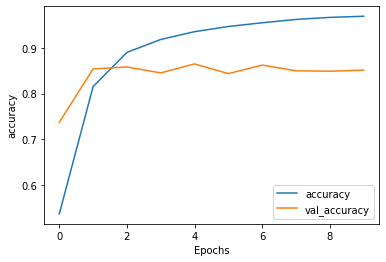

In [22]:
plot_graphs(history, 'accuracy')

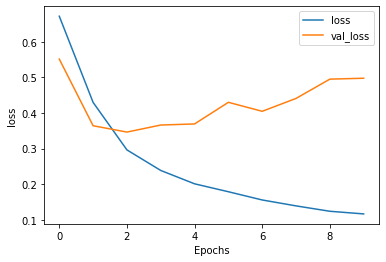

In [23]:
plot_graphs(history, 'loss')

Задание 3. 

Используйте индексы слов и их различное внутреннее представление (word2vec, glove). Как влияет данное преобразование на качество классификации?

In [24]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -zxvf aclImdb_v1.tar.gz > /dev/null
!pip3 install bert-embedding
!pip3 install mxnet-cu100
!pip3 install sentence-transformers


--2020-04-14 09:38:16--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  20.7MB/s    in 6.5s    

2020-04-14 09:38:23 (12.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

     |████████████████████████████████| 29.6MB 89kB/s 
     |████████████████████████████████| 13.8MB 242kB/s 
     |████████████████████████████████| 215kB 36.4MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp36-none-any.whl size=259916 sha256=4e375a530dbe753e240a4b2381ca30c3f8f843da95e0a671195edb40476cd693
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: xarray 0.15.1 has req

     |████████████████████████████████| 540.1MB 30kB/s 
     |████████████████████████████████| 20.2MB 1.4MB/s 
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.18.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bert-embedding 1.0.1 has requirement numpy==1.14.6, but you'll have numpy 1.18.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 450kB 5.7MB/s 
     |████████████████████████████████| 890kB 23.5MB/s 
     |████████████████████████████████| 1.0MB 19.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.5.1-cp36-none-any.whl size=67076 sha256=6e65f4770fa1ac715f83252c187f535184592c4782b59290a85102ffe98a724d
  Stored in directory: /root/.cache/pip/wheels/22/ca/b4/7ca542b411730a8840f8e090df2ddacffa1c4dd9f209684c19
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=45dec8e37b889931bf8d028c54a13e3d10d7a971f6c6801ad77190df75d4a207
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sentence-transformers sacremoses


In [25]:
import os
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import mxnet as mx
from bert_embedding import BertEmbedding
from sentence_transformers import SentenceTransformer
import gensim 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def loadDataset(data_dir):
    
    data = {}
    for partition in ["train", "test"]:
        data[partition] = []
        for sentiment in ["neg", "pos"]:
            lable = 1 if sentiment == "pos" else 0

            path = os.path.join(data_dir, partition, sentiment)
            files = os.listdir(path)
            for f_name in files:
                with open(os.path.join(path, f_name), "r") as f:
                    review = f.read()
                    data[partition].append([review, lable])

    random.seed(4) # to comparision purpose
    random.shuffle(data["train"])
    random.shuffle(data["test"])
    
    data["train"] = pd.DataFrame(data["train"],
                                 columns=['text', 'sentiment'])
    data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment'])

    return data["train"], data["test"]

In [0]:
data_dir = "aclImdb/"
train_data, test_data = loadDataset(data_dir)

In [28]:
train_data.head()

,text,sentiment
0,Salvage is the worst so called horror film I'v...,0
1,I read in the papers that W.Snipes was broke s...,0
2,"This film reinvents the term ""Spring Breakumen...",1
3,The first step to getting off of that road tha...,1
4,In order to stop her homosexual friend Albert ...,1


In [0]:
def NormalizeWithPOS(text):
    # Lemmatization & Stemming according to POS tagging

    word_list = word_tokenize(text)
    rev = []
    lemmatizer = WordNetLemmatizer() 
    stemmer = PorterStemmer() 
    for word, tag in pos_tag(word_list):
        if tag.startswith('J'):
            w = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            w = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            w = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            w = lemmatizer.lemmatize(word, pos='r')
        else:
            w = word
        w = stemmer.stem(w)
        rev.append(w)
    review = ' '.join(rev)
    return review

In [0]:
def cleanText(text):
    
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)
    
    
    text = text.strip().lower()
    
    if embedding is 'WORD2VEC_NO_STOP':
        # Remove Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})
    
        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)
    
    if embedding is not 'BERT':
        # Remove other contractions
        text = re.sub(r"'", ' ', text)
    
    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

In [0]:
embedding = ''
# for Word2Vec with stop words
train_data['clean_text'] = train_data['text'].apply(cleanText)
test_data['clean_text'] = test_data['text'].apply(cleanText)

In [0]:

embedding = 'WORD2VEC_NO_STOP'
# for Word2Vec without stop words
train_data['clean_text_w2v_no_stop'] = train_data['text'].apply(cleanText)
test_data['clean_text_w2v_no_stop'] = test_data['text'].apply(cleanText)

In [0]:
def mean(z): # used for BERT (word version) and Word2Vec
    return sum(itertools.chain(z))/len(z)

In [0]:
def embeddToWord2Vec(text):
    words = word_tokenize(text)
    
    if embedding is 'WORD2VEC_WITH_STOP':
        result = [w2v_with_stop_model.wv[w] for w in words if w in w2v_with_stop_model.wv.vocab]
    else:
        result = [w2v_no_stop_model.wv[w] for w in words if w in w2v_no_stop_model.wv.vocab]
    
    feature = [mean(x) for x in zip(*result)]
    return feature

In [0]:
def wordTokenize(text):
  return word_tokenize(text)

In [36]:
embedding = 'WORD2VEC_WITH_STOP'

words = train_data['clean_text'].apply(wordTokenize)
w2v_with_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 100, window = 5)
word2vec_with_stop_training_features = train_data['clean_text'].apply(embeddToWord2Vec)
word2vec_with_stop_test_features = test_data['clean_text'].apply(embeddToWord2Vec)
feature = [x for x in word2vec_with_stop_training_features.transpose()]
word2vec_with_stop_training_features = np.asarray(feature)

feature = [x for x in word2vec_with_stop_test_features.transpose()]
word2vec_with_stop_test_features = np.asarray(feature)

print(word2vec_with_stop_training_features.shape)

(25000, 100)


In [37]:
embedding = 'WORD2VEC_NO_STOP'
words = train_data['clean_text_w2v_no_stop'].apply(wordTokenize)
w2v_no_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 100, window = 5)
word2vec_no_stop_training_features = train_data['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)
word2vec_no_stop_test_features = test_data['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)
feature = [x for x in word2vec_no_stop_training_features.transpose()]
word2vec_no_stop_training_features = np.asarray(feature)

feature = [x for x in word2vec_no_stop_test_features.transpose()]
word2vec_no_stop_test_features = np.asarray(feature)

print(word2vec_no_stop_training_features.shape)

(25000, 100)


In [0]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.fit(word2vec_no_stop_training_features, train_data["sentiment"])

# Evaluation
y_pred_w2v_no_stop_dt = model.predict(word2vec_no_stop_test_features)

y_prob_w2v_no_stop_dt = model.predict_proba(word2vec_no_stop_test_features)[:,1]

Accuracy: 72.80

Confusion Matrix:
 [[9188 3312]
 [3488 9012]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     12500
           1       0.73      0.72      0.73     12500

    accuracy                           0.73     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.73      0.73      0.73     25000

Area under the ROC curve : 0.728000


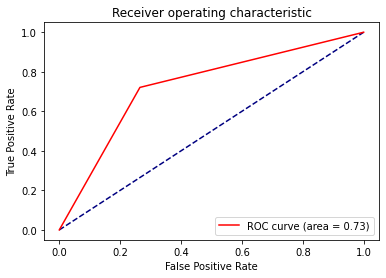

In [40]:
# A function to plot and print result
def printResult(y_pred, y_prob):
    acc = accuracy_score(test_data["sentiment"], y_pred)
    # Result
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')
    cm = confusion_matrix(test_data["sentiment"],y_pred)
    print('Confusion Matrix:\n', cm)
    print(classification_report(test_data["sentiment"],y_pred))

    # Plot
    fpr, tpr, thresholds = roc_curve(test_data["sentiment"], y_prob)
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='lower right')

printResult(y_pred_w2v_no_stop_dt, y_prob_w2v_no_stop_dt)


Задание 5.
Используйте предобученную рекуррентную нейронную сеть (например, DeepMoji или что-то подобное).


In [5]:
!git clone https://github.com/bfelbo/DeepMoji.git
# !pip uninstall -y tensorflow
# !pip uninstall -y tf-nightly
!pip install tensorflow==1.14
import os 
os.chdir('/content/DeepMoji')

Cloning into 'DeepMoji'...
remote: Enumerating objects: 281, done.
remote: Total 281 (delta 0), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (281/281), 110.54 MiB | 38.10 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Checking out files: 100% (66/66), done.


In [6]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [8]:
from __future__ import print_function
import numpy as np
from keras.preprocessing import sequence
from keras.datasets import imdb
from deepmoji.model_def import deepmoji_architecture

# Seed for reproducibility
np.random.seed(1337)

nb_tokens = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=nb_tokens)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = deepmoji_architecture(nb_classes=2, nb_tokens=nb_tokens, maxlen=maxlen)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=5,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)
Build model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "DeepMoji"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 256)      5120000     input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 80, 256)      0           embedd

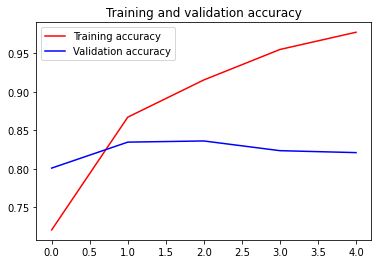

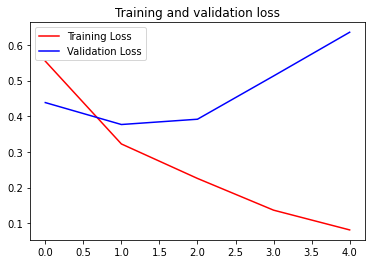

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()